# Definition

[`WebDriverWait`](https://selenium-python.readthedocs.io/waits.html) is a *class* in the **Selenium Python library** that *allows code to wait for elements to appear on a page or for certain conditions to be met before proceeding with the execution*. It is used to wait for a specified amount of time for an element to be present on the page before interacting with it. This can be useful in situations where elements on a page may take longer to load or may be generated dynamically by `JavaScript`.

Implicit Wait and Explicit Wait are used to handle the synchronization issues that may occur when automating web applications. However, they differ in the way they handle waiting for elements to appear on the page.

In general, an [***<font color = "violet">Implicit wait</font>***](https://selenium-python.readthedocs.io/waits.html#implicit-waits) can be useful when you want to *wait for all elements on a page to load*, while an [***<font color = "cyan">Explicit wait</font>***](https://selenium-python.readthedocs.io/waits.html#explicit-waits) is more useful when you want to *wait for a specific element or condition to be met before proceeding with the execution*.



# [Implicit wait](https://selenium-python.readthedocs.io/waits.html#implicit-waits)

[***<font color = "violet">Implicit wait</font>***](https://selenium-python.readthedocs.io/waits.html#implicit-waits): An implicit wait is a type of wait that is built into Selenium and is set ***globally for the entire WebDriver instance***. Once set, the implicit wait will be in effect for the entire time the WebDriver instance is in use. It will cause Selenium to poll the DOM for a certain amount of time when trying to find an element or elements if they are not immediately available.

Using Implicit Wait <br>
Implicit Wait uses a global setup and will affecting all steps, by this setup we will write the script under the configuration file

1. Navigate to `conftest.py`
2. Navigate to the `webdriver` function generator
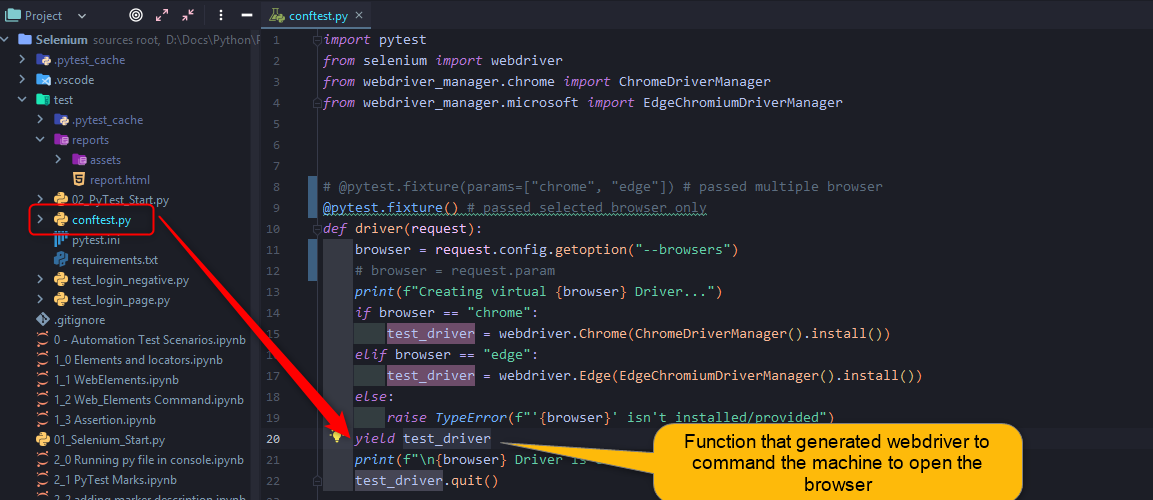
3. Add the implicit wait script before the driver is called (generate)
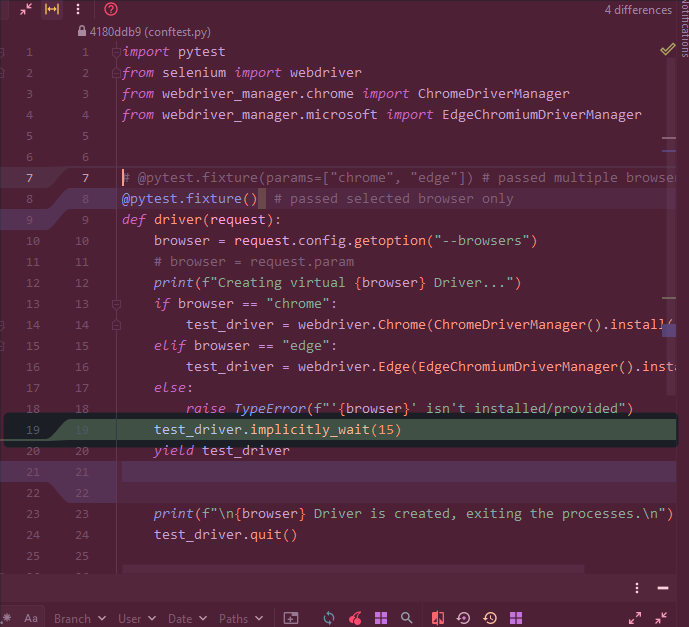
4. Run the test and see what happen

# [Explicit wait](https://selenium-python.readthedocs.io/waits.html#explicit-waits)

[***<font color = "cyan">Explicit wait</font>***](https://selenium-python.readthedocs.io/waits.html#explicit-waits): An explicit wait is a type of wait that ***is set for a specific element or elements***. It is used when you want to wait for a specific condition to be met before proceeding with the execution. It is applied only for the specific element identified and for the time specified. It can be used for the elements which are not yet loaded on the page but expected to appear.

Using Explicit Wait <br>
While implicit wait is using a global setup and affecting all files that using the configuration, epxlicit wait is more efficient since we're using the script `"only"` on the step/processes that needed the waiting time but it wll take longer time to debugging due we have to find the source one by one. <br>

1. Go to the test file
2. Navigate to the lines that using a waiting/loading processes to execute
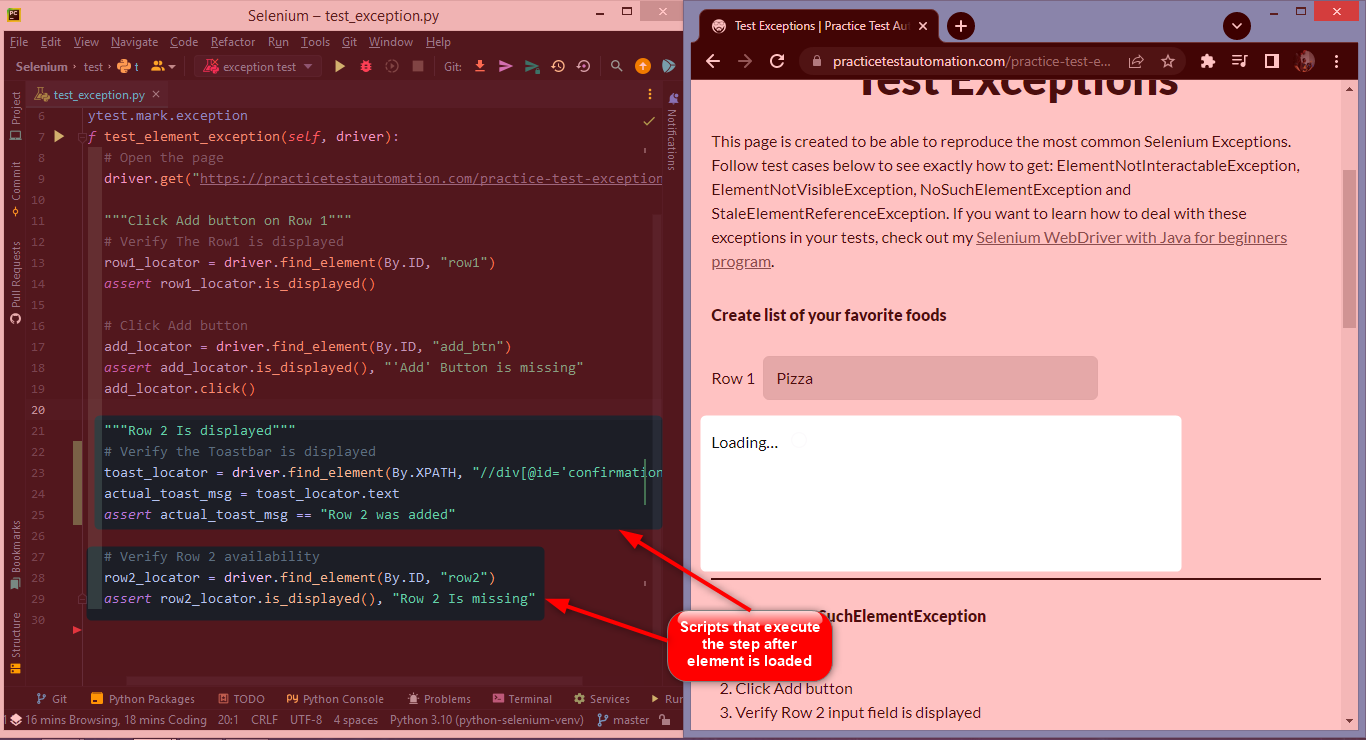
3. Add waiting scripts to that lines <br>
`wait = WebDriverWait(driver, 15)` <br> 
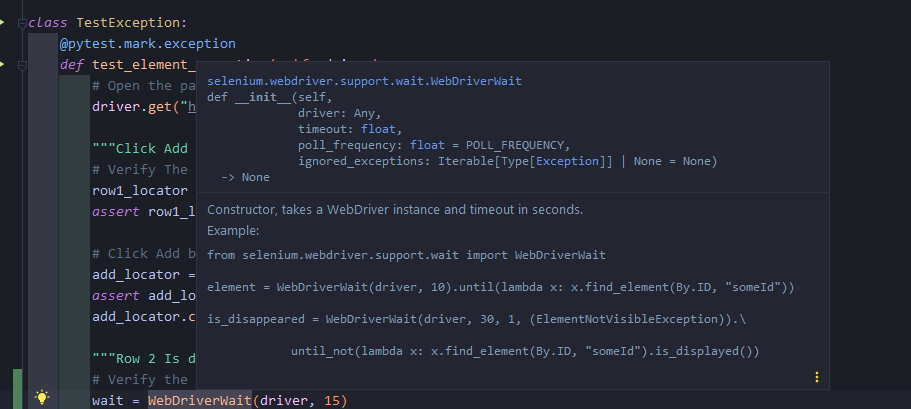
    - When there's a warning, it's mean the module is not exist, in this case we should insert the module first
    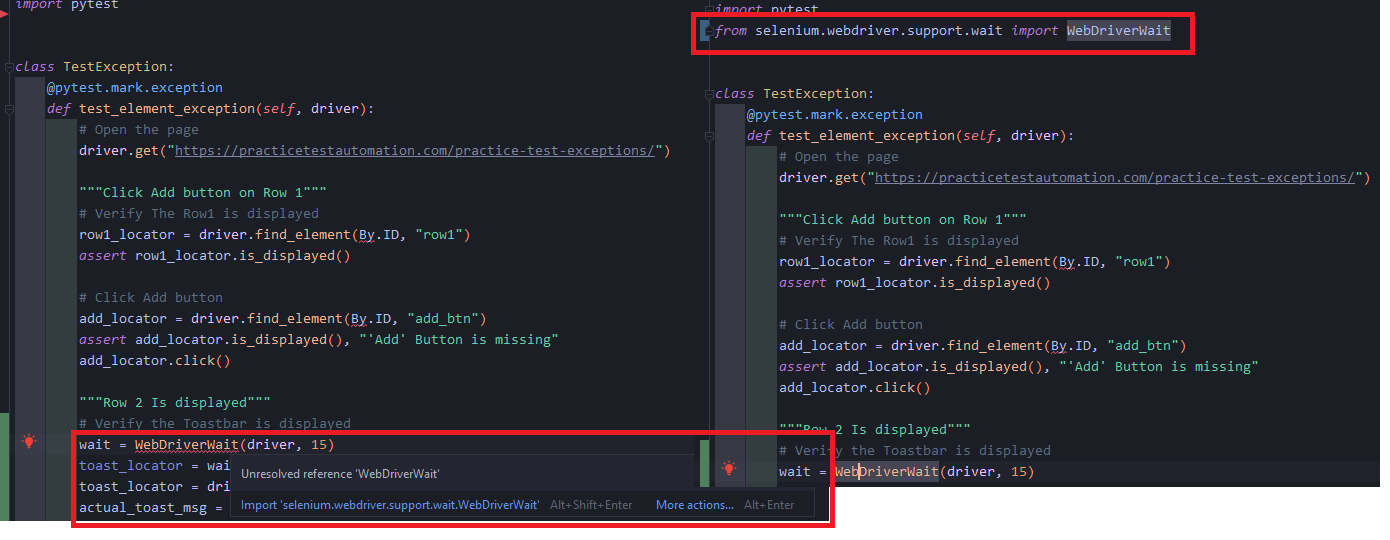
    - variable = `WebDriverWait(driver, 15)` <br>
    It is a mandatory script to use inside the explicit wait, it's similar with the implicity that affect a global configuration, but in this case, we're only using it under the mentioned script, so it will not affecting all files
    - The first is the "driver" object, which represents the browser that is being controlled by the script, and the second is the number of seconds to wait before timing out. The script is telling the script to wait for 15 seconds before timing out.
4. Pass the expected conditions after the waiting scripts is written <br>
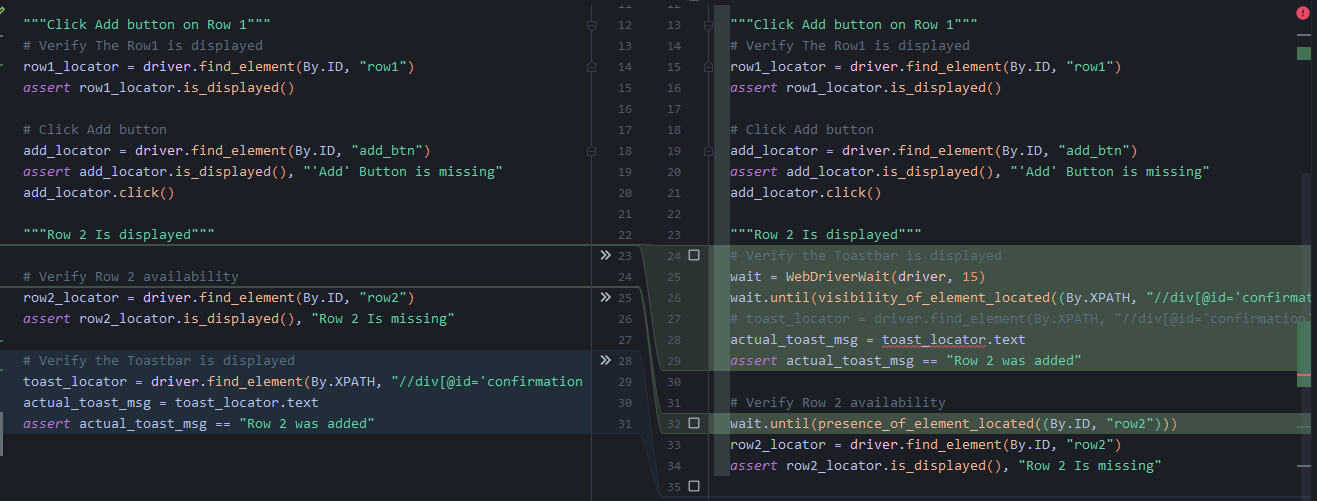
The complete documentation from this object (expected conditions) can be found [here](https://www.selenium.dev/selenium/docs/api/py/webdriver_support/selenium.webdriver.support.expected_conditions.html) <br>
We're expecting 2 elements that need to be checked after the loading has finished
    - The Toast Bar <br>
    This element isn't static, which means this elements will not be displayed coninuosly and at the certain times the toast will be disapear, in this case we should using any conditions that [*"displaying only"*](https://www.selenium.dev/selenium/docs/api/py/webdriver_support/selenium.webdriver.support.expected_conditions.html#selenium.webdriver.support.expected_conditions.visibility_of_element_located) instead [*"available forever"*](https://www.selenium.dev/selenium/docs/api/py/webdriver_support/selenium.webdriver.support.expected_conditions.html#selenium.webdriver.support.expected_conditions.presence_of_element_located) <br>
    `wait.until(visibility_of_element_located((By.XPATH, "//div[@id='confirmation']")))` <br>
        - This script is telling the processes to wait for an element located by xpath `"//div[@id='confirmation']"` ***to be visible*** on the page before proceeding with the script.
    - Row 2 <br>
    This is static elements, which means this elements "[*will stay on the page*](https://www.selenium.dev/selenium/docs/api/py/webdriver_support/selenium.webdriver.support.expected_conditions.html#selenium.webdriver.support.expected_conditions.presence_of_element_located)" unless we do something to make it disapear <br>
    `wait.until(presence_of_element_located((By.ID, "row2")))` <br>
        - This script is telling the processes to wait up to 15 seconds for an element with the `ID` 'row2' to be present in the ***DOM*** *(Document Object Model)* before proceeding with the script. This means that it *waits for the element to be present in the page source*, whether it is ***visible or not***.
5. Change the `find_element` method with the previous script <br>
Previous method is using the passed elements as the arguments, so we don't need the locator anymore since the element has been passed to the wait arguments <br>
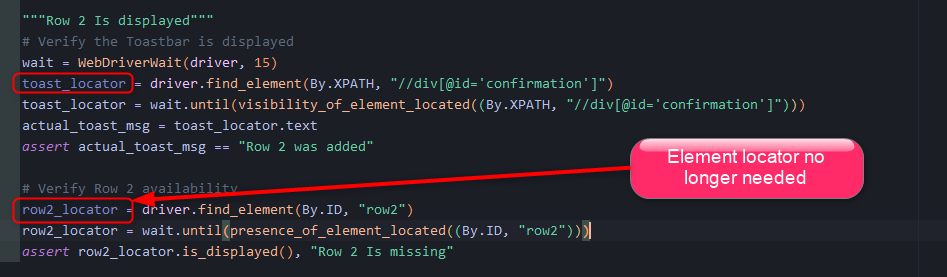 <br>
Final Script <br>
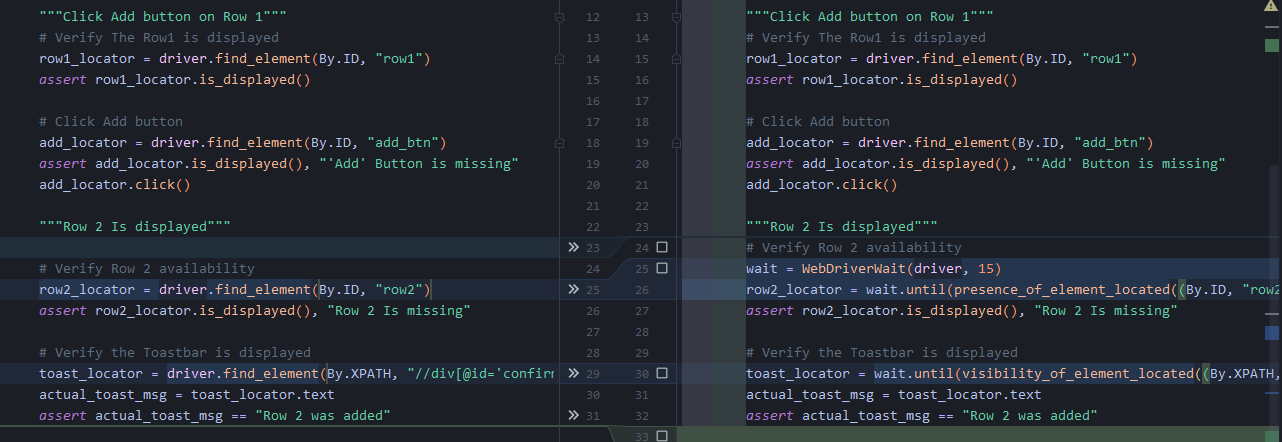
6. Try to run the test
